In [1]:
import datetime
import numpy as np
import pandas as pd
from yahoo_finance_api import YahooFinance as yf
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
# %matplotlib notebook

### Load the data for 15 minutes interval

In [2]:
stock_symbol = 'TCS.NS'

my_stock = pd.DataFrame()

my_stock = yf(ticker = stock_symbol, 
                       result_range='59d',
                       interval = '15m',
                       dropna = True).result[['Open', 'High', 'Low', 'Close', 'Volume']]

print('Shape of the dataframe: ', my_stock.shape)

my_stock.head()

Shape of the dataframe:  (1475, 5)


/home/arjun/anaconda3/lib/python3.7/site-packages/yahoo_finance_api-0.0.1-py3.7.egg/yahoo_finance_api/__init__.py:73: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


,Open,High,Low,Close,Volume
2020-08-03 09:15:00,2290.40,2301.7,2257.00,2263.05,249145.0
2020-08-03 09:30:00,2263.05,2274.6,2258.30,2266.35,149107.0
2020-08-03 09:45:00,2266.35,2267.0,2257.00,2260.00,94737.0
2020-08-03 10:00:00,2259.80,2263.5,2242.00,2243.00,187766.0
2020-08-03 10:15:00,2243.35,2250.9,2242.15,2249.15,103850.0


In [3]:
close_series = my_stock['Close']
close_series

2020-08-03 09:15:00    2263.05
2020-08-03 09:30:00    2266.35
2020-08-03 09:45:00    2260.00
2020-08-03 10:00:00    2243.00
2020-08-03 10:15:00    2249.15
                        ...   
2020-10-23 14:30:00    2680.70
2020-10-23 14:45:00    2684.20
2020-10-23 15:00:00    2683.15
2020-10-23 15:15:00    2690.00
2020-10-23 15:22:14    2688.70
Name: Close, Length: 1475, dtype: float64

<IPython.core.display.Javascript object>


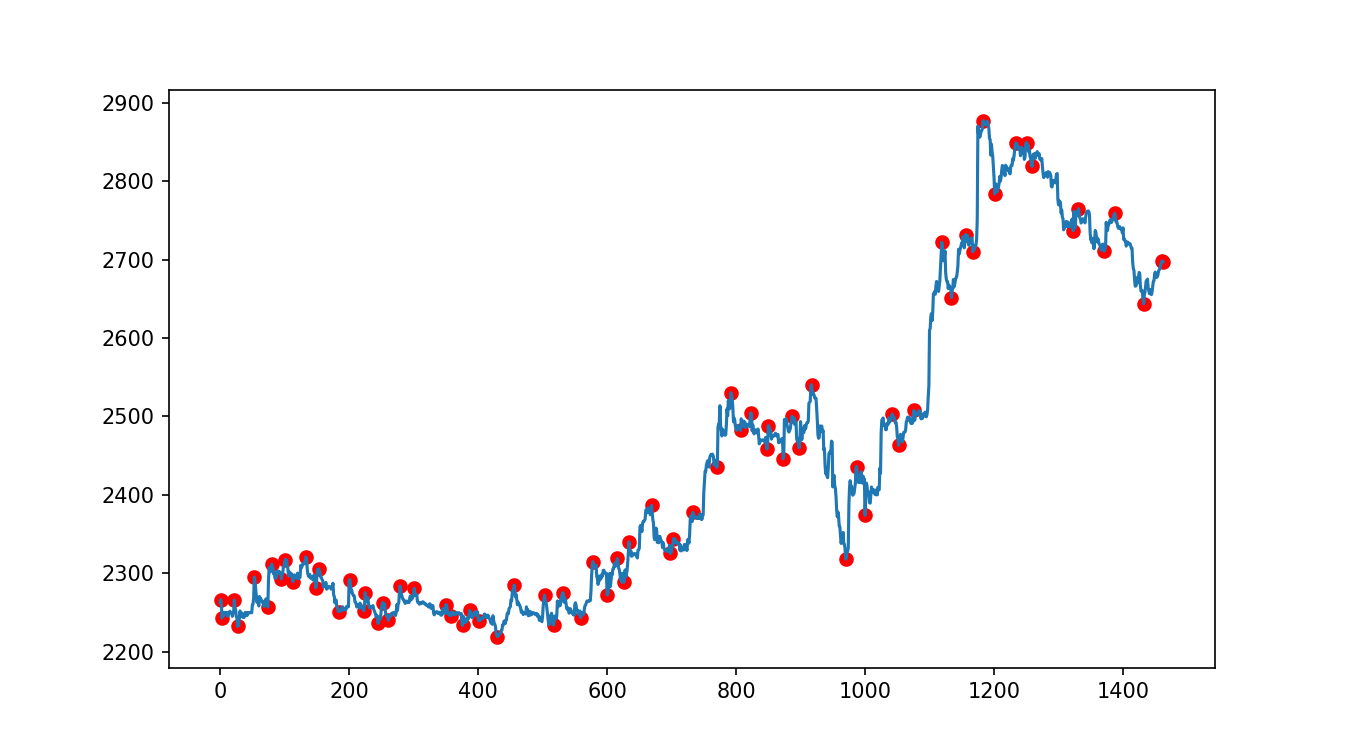

In [4]:
# find relative extrema
# argrelextrema: report back indexes of relative extrema
# comparator: whether or not the point it is looking at is bigger or less than the other points around it
# max_idx: will return the index of maximums
# min_idx: will return the index of minimums
# order: is the amound of points around it is using to get the minimum and maximum values
for i in range(100, len(close_series)):
    max_idx = list(argrelextrema(close_series.values, comparator = np.greater, order = 15)[0])
    min_idx = list(argrelextrema(close_series.values, comparator = np.less, order = 15)[0])
    idx = max_idx + min_idx + [len(close_series.values[:i] - 1)]
idx.sort()
peaks = close_series.values[idx]
plt.figure(figsize = (9,5))
plt.plot(close_series.values)
plt.scatter(idx, peaks, c = 'r')
plt.show()

### Search for bullish gartley pattern

A_B retracement to X_A is: 59.35% which is within tolerance limit of 5.0% to 61.8% 
B_C retracement to A_B is: 66.84% which is within tolerance limit of 5.0% in range of 38.2 to 88.6%
C_D retracement to B_C is: 144.08% which is within tolerance limit of 5.0% in range of 127 to 161.8%


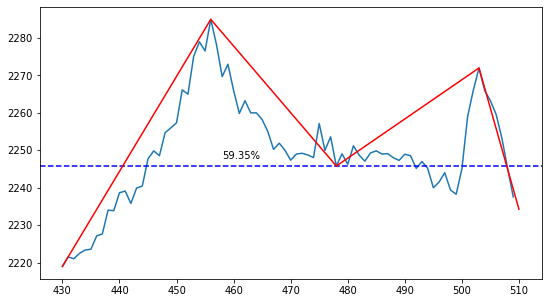

A_B retracement to X_A is: 59.35% which is within tolerance limit of 5.0% to 61.8% 
B_C retracement to A_B is: 66.84% which is within tolerance limit of 5.0% in range of 38.2 to 88.6%
C_D retracement to B_C is: 134.35% which is within tolerance limit of 5.0% in range of 127 to 161.8%


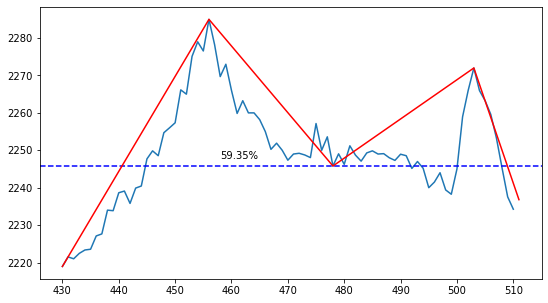

A_B retracement to X_A is: 59.35% which is within tolerance limit of 5.0% to 61.8% 
B_C retracement to A_B is: 66.84% which is within tolerance limit of 5.0% in range of 38.2 to 88.6%
C_D retracement to B_C is: 122.9% which is within tolerance limit of 5.0% in range of 127 to 161.8%


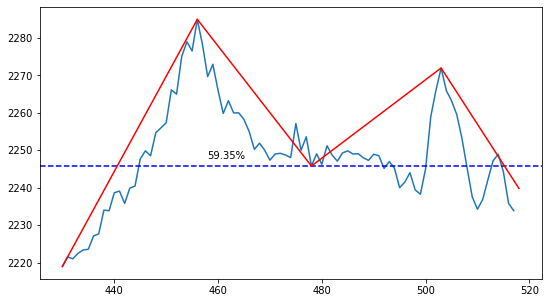

In [52]:
error_allowance = 5.0/100
for i in range(100, len(close_series)):
    max_idx = list(argrelextrema(close_series.values[:i], comparator = np.greater, order = 10)[0])
    min_idx = list(argrelextrema(close_series.values[:i], comparator = np.less, order = 10)[0])
    idx = max_idx + min_idx + [len(close_series.values[:i] - 1)]
    idx.sort()
    
    current_index = idx[-5:]
    
    current_price = close_series.values[current_index]
    
    start = min(current_index)
    end = max(current_index)
    
    X_A = current_price[1] - current_price[0]
    A_B = current_price[2] - current_price[1]
    B_C = current_price[3] - current_price[2]
    C_D = current_price[4] - current_price[3]
    
    # for bullish gartlet pattern
    if ((X_A > 0) & (A_B < 0) & (B_C > 0) & (C_D < 0)):
        
        A_B_range = np.array([0.618 - error_allowance, 0.618 + error_allowance]) * abs(X_A)
        B_C_range = np.array([0.382 - error_allowance, 0.886 + error_allowance]) * abs(A_B)
        C_D_range = np.array([1.27 - error_allowance, 1.618 + error_allowance]) * abs(B_C)
    
        if ((A_B_range[0] < abs(A_B) < A_B_range[1]) & (B_C_range[0] < abs(B_C) < B_C_range[1]) & (C_D_range[0] < abs(C_D) < C_D_range[1])):
            print('A_B retracement to X_A is: {}% which is within tolerance limit of {}% to 61.8% '.format(round(((abs(A_B) / abs(X_A))*100), 2), error_allowance*100))
            print('B_C retracement to A_B is: {}% which is within tolerance limit of {}% in range of 38.2 to 88.6%'.format(round(((abs(B_C) / abs(A_B))*100), 2), error_allowance*100))
            print('C_D retracement to B_C is: {}% which is within tolerance limit of {}% in range of 127 to 161.8%'.format(round(((abs(C_D) / abs(B_C))*100), 2), error_allowance*100))
            plt.figure(figsize = (9,5))
            plt.plot(np.arange(start,i), close_series.values[start:i])
            ### horizontal_line
            plt.axhline(y = current_price[2], color = 'b', linestyle = '--')
            plt.text(current_index[2]-20, current_price[2]+2, str(round(((abs(A_B) / abs(X_A))*100), 2))+'%')
            plt.plot(current_index, current_price, c = 'r')
            plt.show()
            
#         else:
#             print('There are no bullish gartley patterns')

### Search for bearish gartley pattern

A_B retracement to X_A is: 67.98% which is within tolerance limit of 10.0% to 61.8% 
B_C retracement to A_B is: 84.62% which is within tolerance limit of 10.0% in range of 38.2 to 88.6%
C_D retracement to B_C is: 155.21% which is within tolerance limit of 10.0% in range of 127 to 161.8%


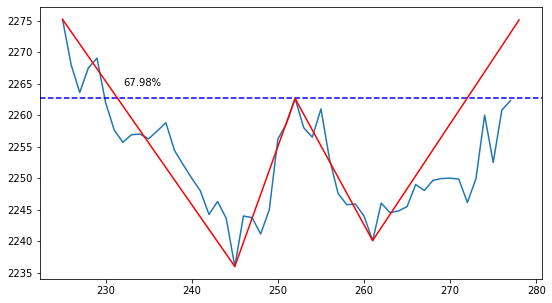

In [69]:
error_allowance = 10.0/100
for i in range(100, len(close_series)):
    max_idx = list(argrelextrema(close_series.values[:i], comparator = np.greater, order = 10)[0])
    min_idx = list(argrelextrema(close_series.values[:i], comparator = np.less, order = 10)[0])
    idx = max_idx + min_idx + [len(close_series.values[:i] - 1)]
    idx.sort()
    
    current_index = idx[-5:]
    
    current_price = close_series.values[current_index]
    
    start = min(current_index)
    end = max(current_index)
    
    X_A = current_price[1] - current_price[0]
    A_B = current_price[2] - current_price[1]
    B_C = current_price[3] - current_price[2]
    C_D = current_price[4] - current_price[3]
    
    # for bearing gartlet pattern
    if ((X_A < 0) & (A_B > 0) & (B_C < 0) & (C_D > 0)):
        
        A_B_range = np.array([0.618 - error_allowance, 0.618 + error_allowance]) * abs(X_A)
        B_C_range = np.array([0.382 - error_allowance, 0.886 + error_allowance]) * abs(A_B)
        C_D_range = np.array([1.27 - error_allowance, 1.618 + error_allowance]) * abs(B_C)
    
        if ((A_B_range[0] < abs(A_B) < A_B_range[1]) & (B_C_range[0] < abs(B_C) < B_C_range[1]) & (C_D_range[0] < abs(C_D) < C_D_range[1])):
            print('A_B retracement to X_A is: {}% which is within tolerance limit of {}% to 61.8% '.format(round(((abs(A_B) / abs(X_A))*100), 2), error_allowance*100))
            print('B_C retracement to A_B is: {}% which is within tolerance limit of {}% in range of 38.2 to 88.6%'.format(round(((abs(B_C) / abs(A_B))*100), 2), error_allowance*100))
            print('C_D retracement to B_C is: {}% which is within tolerance limit of {}% in range of 127 to 161.8%'.format(round(((abs(C_D) / abs(B_C))*100), 2), error_allowance*100))
            plt.figure(figsize = (9,5))
            plt.plot(np.arange(start,i), close_series.values[start:i])
            ### horizontal_line
            plt.axhline(y = current_price[2], color = 'b', linestyle = '--')
            plt.text(current_index[2]-20, current_price[2]+2, str(round(((abs(A_B) / abs(X_A))*100), 2))+'%')
            plt.plot(current_index, current_price, c = 'r')
            plt.show()
            
#         else:
#             print('There are no bearish gartley patterns')

### Function for peaks, gartley, butterfly, bat, crab patterns

In [18]:
def get_peaks(series, order = 10):
    max_idx = list(argrelextrema(series, comparator = np.greater, order = order)[0])
    min_idx = list(argrelextrema(series, comparator = np.less, order = order)[0])
    idx = max_idx + min_idx + [len(series) - 1]
    idx.sort()
    current_index = idx[-5:]
    current_price = (series)[[current_index]]
    
    start = min(current_index)
    end = max(current_index)
    return idx, current_index, current_price, start, end

In [29]:
def get_gartley(moves, error_allowance, series,i):
    X_A = moves[0]
    A_B = moves[1]
    B_C = moves[2]
    C_D = moves[3]
    # for bullish gartlet pattern
    if ((X_A > 0) & (A_B < 0) & (B_C > 0) & (C_D < 0)):
        
        A_B_range = np.array([0.618 - error_allowance, 0.618 + error_allowance]) * abs(X_A)
        B_C_range = np.array([0.382 - error_allowance, 0.886 + error_allowance]) * abs(A_B)
        C_D_range = np.array([1.27 - error_allowance, 1.618 + error_allowance]) * abs(B_C)
    
        if ((A_B_range[0] < abs(A_B) < A_B_range[1]) & (B_C_range[0] < abs(B_C) < B_C_range[1]) & (C_D_range[0] < abs(C_D) < C_D_range[1])):
            print('A_B retracement to X_A is: {}% which is within tolerance limit of {}% to 61.8% '.format(round(((abs(A_B) / abs(X_A))*100), 2), error_allowance*100))
            print('B_C retracement to A_B is: {}% which is within tolerance limit of {}% in range of 38.2 to 88.6%'.format(round(((abs(B_C) / abs(A_B))*100), 2), error_allowance*100))
            print('C_D retracement to B_C is: {}% which is within tolerance limit of {}% in range of 127 to 161.8%'.format(round(((abs(C_D) / abs(B_C))*100), 2), error_allowance*100))
            plt.figure(figsize = (9,5))
            plt.plot(np.arange(start,i), series[start:i])
            ### horizontal_line
            plt.axhline(y = current_price[2], color = 'b', linestyle = '--')
            plt.text(current_index[2]-20, current_price[2]+2, str(round(((abs(A_B) / abs(X_A))*100), 2))+'%')
            plt.plot(current_index, current_price, c = 'r')
            plt.title('Bullish Gartley pattern')
            plt.show()
    
    # for Bearish gartlet pattern
    elif ((X_A < 0) & (A_B > 0) & (B_C < 0) & (C_D > 0)):
        
        A_B_range = np.array([0.618 - error_allowance, 0.618 + error_allowance]) * abs(X_A)
        B_C_range = np.array([0.382 - error_allowance, 0.886 + error_allowance]) * abs(A_B)
        C_D_range = np.array([1.27 - error_allowance, 1.618 + error_allowance]) * abs(B_C)
    
        if ((A_B_range[0] < abs(A_B) < A_B_range[1]) & (B_C_range[0] < abs(B_C) < B_C_range[1]) & (C_D_range[0] < abs(C_D) < C_D_range[1])):
            print('A_B retracement to X_A is: {}% which is within tolerance limit of {}% to 61.8% '.format(round(((abs(A_B) / abs(X_A))*100), 2), error_allowance*100))
            print('B_C retracement to A_B is: {}% which is within tolerance limit of {}% in range of 38.2 to 88.6%'.format(round(((abs(B_C) / abs(A_B))*100), 2), error_allowance*100))
            print('C_D retracement to B_C is: {}% which is within tolerance limit of {}% in range of 127 to 161.8%'.format(round(((abs(C_D) / abs(B_C))*100), 2), error_allowance*100))
            plt.figure(figsize = (9,5))
            plt.plot(np.arange(start,i), series[start:i])
            ### horizontal_line
            plt.axhline(y = current_price[2], color = 'b', linestyle = '--')
            plt.text(current_index[2]-20, current_price[2]+2, str(round(((abs(A_B) / abs(X_A))*100), 2))+'%')
            plt.plot(current_index, current_price, c = 'r')
            plt.title('Bearish Gartley pattern')
            plt.show()
            
#         else:
#             print('There are no bearish gartley patterns')    

In [30]:
def get_butterfly(moves, error_allowance, series,i):
    X_A = moves[0]
    A_B = moves[1]
    B_C = moves[2]
    C_D = moves[3]
    # for bullish butterfly pattern
    if ((X_A > 0) & (A_B < 0) & (B_C > 0) & (C_D < 0)):
        
        A_B_range = np.array([0.786 - error_allowance, 0.786 + error_allowance]) * abs(X_A)
        B_C_range = np.array([0.382 - error_allowance, 0.886 + error_allowance]) * abs(A_B)
        C_D_range = np.array([1.618 - error_allowance, 2.618 + error_allowance]) * abs(B_C)
    
        if ((A_B_range[0] < abs(A_B) < A_B_range[1]) & (B_C_range[0] < abs(B_C) < B_C_range[1]) & (C_D_range[0] < abs(C_D) < C_D_range[1])):
            print('A_B retracement to X_A is: {}% which is within tolerance limit of {}% to 78.6% '.format(round(((abs(A_B) / abs(X_A))*100), 2), error_allowance*100))
            print('B_C retracement to A_B is: {}% which is within tolerance limit of {}% in range of 38.2 to 88.6%'.format(round(((abs(B_C) / abs(A_B))*100), 2), error_allowance*100))
            print('C_D retracement to B_C is: {}% which is within tolerance limit of {}% in range of 161.8 to 261.8%'.format(round(((abs(C_D) / abs(B_C))*100), 2), error_allowance*100))
            plt.figure(figsize = (9,5))
            plt.plot(np.arange(start,i), series[start:i])
            ### horizontal_line
            plt.axhline(y = current_price[2], color = 'b', linestyle = '--')
            plt.text(current_index[2]-20, current_price[2]+2, str(round(((abs(A_B) / abs(X_A))*100), 2))+'%')
            plt.plot(current_index, current_price, c = 'r')
            plt.title('Bullish butterfly pattern')
            plt.show()
    
    # for Bearish butterfly pattern
    elif ((X_A < 0) & (A_B > 0) & (B_C < 0) & (C_D > 0)):
        
        A_B_range = np.array([0.382 - error_allowance, 0.5 + error_allowance]) * abs(X_A)
        B_C_range = np.array([0.382 - error_allowance, 0.886 + error_allowance]) * abs(A_B)
        C_D_range = np.array([1.618 - error_allowance, 2.618 + error_allowance]) * abs(B_C)
        
        if ((A_B_range[0] < abs(A_B) < A_B_range[1]) & (B_C_range[0] < abs(B_C) < B_C_range[1]) & (C_D_range[0] < abs(C_D) < C_D_range[1])):
            print('A_B retracement to X_A is: {}% which is within tolerance limit of {}% to 78.6% '.format(round(((abs(A_B) / abs(X_A))*100), 2), error_allowance*100))
            print('B_C retracement to A_B is: {}% which is within tolerance limit of {}% in range of 38.2 to 88.6%'.format(round(((abs(B_C) / abs(A_B))*100), 2), error_allowance*100))
            print('C_D retracement to B_C is: {}% which is within tolerance limit of {}% in range of 161.8 to 261.8%'.format(round(((abs(C_D) / abs(B_C))*100), 2), error_allowance*100))
            plt.figure(figsize = (9,5))
            plt.plot(np.arange(start,i), series[start:i])
            ### horizontal_line
            plt.axhline(y = current_price[2], color = 'b', linestyle = '--')
            plt.text(current_index[2]-20, current_price[2]+2, str(round(((abs(A_B) / abs(X_A))*100), 2))+'%')
            plt.plot(current_index, current_price, c = 'r')
            plt.title('Bearish butterfly pattern')
            plt.show()
            
#         else:
#             print('There are no bearish gartley patterns')    

In [33]:
def get_bat(moves, error_allowance, series,i):
    X_A = moves[0]
    A_B = moves[1]
    B_C = moves[2]
    C_D = moves[3]
    # for bullish butterfly pattern
    if ((X_A > 0) & (A_B < 0) & (B_C > 0) & (C_D < 0)):
        
        A_B_range = np.array([0.382 - error_allowance, 0.5 + error_allowance]) * abs(X_A)
        B_C_range = np.array([0.382 - error_allowance, 0.886 + error_allowance]) * abs(A_B)
        C_D_range = np.array([1.618 - error_allowance, 2.618 + error_allowance]) * abs(B_C)
    
        if ((A_B_range[0] < abs(A_B) < A_B_range[1]) & (B_C_range[0] < abs(B_C) < B_C_range[1]) & (C_D_range[0] < abs(C_D) < C_D_range[1])):
            print('A_B retracement to X_A is: {}% which is within tolerance limit of {}% to range of 38.2 to 50.% '.format(round(((abs(A_B) / abs(X_A))*100), 2), error_allowance*100))
            print('B_C retracement to A_B is: {}% which is within tolerance limit of {}% in range of 38.2 to 88.6%'.format(round(((abs(B_C) / abs(A_B))*100), 2), error_allowance*100))
            print('C_D retracement to B_C is: {}% which is within tolerance limit of {}% in range of 161.8 to 261.8%'.format(round(((abs(C_D) / abs(B_C))*100), 2), error_allowance*100))
            plt.figure(figsize = (9,5))
            plt.plot(np.arange(start,i), series[start:i])
            ### horizontal_line
            plt.axhline(y = current_price[2], color = 'b', linestyle = '--')
            plt.text(current_index[2]-20, current_price[2]+2, str(round(((abs(A_B) / abs(X_A))*100), 2))+'%')
            plt.plot(current_index, current_price, c = 'r')
            plt.title('Bullish bat pattern')
            plt.show()
    
    # for Bearish butterfly pattern
    elif ((X_A < 0) & (A_B > 0) & (B_C < 0) & (C_D > 0)):
        
        A_B_range = np.array([0.382 - error_allowance, 0.5 + error_allowance]) * abs(X_A)
        B_C_range = np.array([0.382 - error_allowance, 0.886 + error_allowance]) * abs(A_B)
        C_D_range = np.array([1.618 - error_allowance, 2.618 + error_allowance]) * abs(B_C)
        
        if ((A_B_range[0] < abs(A_B) < A_B_range[1]) & (B_C_range[0] < abs(B_C) < B_C_range[1]) & (C_D_range[0] < abs(C_D) < C_D_range[1])):
            print('A_B retracement to X_A is: {}% which is within tolerance limit of {}% to range of 38.2 to 50.% '.format(round(((abs(A_B) / abs(X_A))*100), 2), error_allowance*100))
            print('B_C retracement to A_B is: {}% which is within tolerance limit of {}% in range of 38.2 to 88.6%'.format(round(((abs(B_C) / abs(A_B))*100), 2), error_allowance*100))
            print('C_D retracement to B_C is: {}% which is within tolerance limit of {}% in range of 161.8 to 261.8%'.format(round(((abs(C_D) / abs(B_C))*100), 2), error_allowance*100))
            plt.figure(figsize = (9,5))
            plt.plot(np.arange(start,i), series[start:i])
            ### horizontal_line
            plt.axhline(y = current_price[2], color = 'b', linestyle = '--')
            plt.text(current_index[2]-20, current_price[2]+2, str(round(((abs(A_B) / abs(X_A))*100), 2))+'%')
            plt.plot(current_index, current_price, c = 'r')
            plt.title('Bearish bat pattern')
            plt.show()
            
#         else:
#             print('There are no bearish gartley patterns')    

In [34]:
def get_crab(moves, error_allowance, series,i):
    X_A = moves[0]
    A_B = moves[1]
    B_C = moves[2]
    C_D = moves[3]
    # for bullish butterfly pattern
    if ((X_A > 0) & (A_B < 0) & (B_C > 0) & (C_D < 0)):
        
        A_B_range = np.array([0.382 - error_allowance, 0.618 + error_allowance]) * abs(X_A)
        B_C_range = np.array([0.382 - error_allowance, 0.886 + error_allowance]) * abs(A_B)
        C_D_range = np.array([2.24 - error_allowance, 3.618 + error_allowance]) * abs(B_C)
    
        if ((A_B_range[0] < abs(A_B) < A_B_range[1]) & (B_C_range[0] < abs(B_C) < B_C_range[1]) & (C_D_range[0] < abs(C_D) < C_D_range[1])):
            print('A_B retracement to X_A is: {}% which is within tolerance limit of {}% to range of 38.2 to 61.8% '.format(round(((abs(A_B) / abs(X_A))*100), 2), error_allowance*100))
            print('B_C retracement to A_B is: {}% which is within tolerance limit of {}% in range of 38.2 to 88.6%'.format(round(((abs(B_C) / abs(A_B))*100), 2), error_allowance*100))
            print('C_D retracement to B_C is: {}% which is within tolerance limit of {}% in range of 224 to 361.8%'.format(round(((abs(C_D) / abs(B_C))*100), 2), error_allowance*100))
            plt.figure(figsize = (9,5))
            plt.plot(np.arange(start,i), series[start:i])
            ### horizontal_line
            plt.axhline(y = current_price[2], color = 'b', linestyle = '--')
            plt.text(current_index[2]-20, current_price[2]+2, str(round(((abs(A_B) / abs(X_A))*100), 2))+'%')
            plt.plot(current_index, current_price, c = 'r')
            plt.title('Bullish bat pattern')
            plt.show()
    
    # for Bearish butterfly pattern
    elif ((X_A < 0) & (A_B > 0) & (B_C < 0) & (C_D > 0)):
        
        A_B_range = np.array([0.382 - error_allowance, 0.618 + error_allowance]) * abs(X_A)
        B_C_range = np.array([0.382 - error_allowance, 0.886 + error_allowance]) * abs(A_B)
        C_D_range = np.array([2.24 - error_allowance, 3.618 + error_allowance]) * abs(B_C)
        
        if ((A_B_range[0] < abs(A_B) < A_B_range[1]) & (B_C_range[0] < abs(B_C) < B_C_range[1]) & (C_D_range[0] < abs(C_D) < C_D_range[1])):
            print('A_B retracement to X_A is: {}% which is within tolerance limit of {}% to range of 38.2 to 61.8% '.format(round(((abs(A_B) / abs(X_A))*100), 2), error_allowance*100))
            print('B_C retracement to A_B is: {}% which is within tolerance limit of {}% in range of 38.2 to 88.6%'.format(round(((abs(B_C) / abs(A_B))*100), 2), error_allowance*100))
            print('C_D retracement to B_C is: {}% which is within tolerance limit of {}% in range of 224 to 361.8%'.format(round(((abs(C_D) / abs(B_C))*100), 2), error_allowance*100))
            plt.figure(figsize = (9,5))
            plt.plot(np.arange(start,i), series[start:i])
            ### horizontal_line
            plt.axhline(y = current_price[2], color = 'b', linestyle = '--')
            plt.text(current_index[2]-20, current_price[2]+2, str(round(((abs(A_B) / abs(X_A))*100), 2))+'%')
            plt.plot(current_index, current_price, c = 'r')
            plt.title('Bearish bat pattern')
            plt.show()
            
#         else:
#             print('There are no bearish gartley patterns')    

A_B retracement to X_A is: 67.98% which is within tolerance limit of 10.0% to 61.8% 
B_C retracement to A_B is: 84.62% which is within tolerance limit of 10.0% in range of 38.2 to 88.6%
C_D retracement to B_C is: 155.21% which is within tolerance limit of 10.0% in range of 127 to 161.8%


/home/arjun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


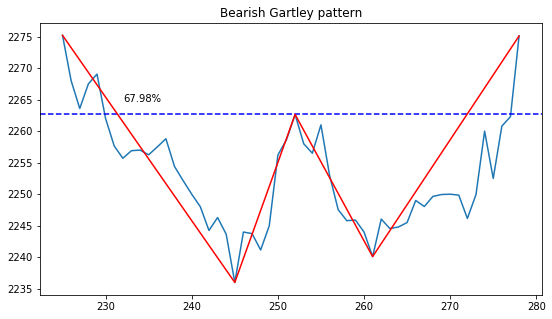

/home/arjun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


A_B retracement to X_A is: 50.8% which is within tolerance limit of 10.0% to range of 38.2 to 50.% 
B_C retracement to A_B is: 86.88% which is within tolerance limit of 10.0% in range of 38.2 to 88.6%
C_D retracement to B_C is: 164.06% which is within tolerance limit of 10.0% in range of 161.8 to 261.8%


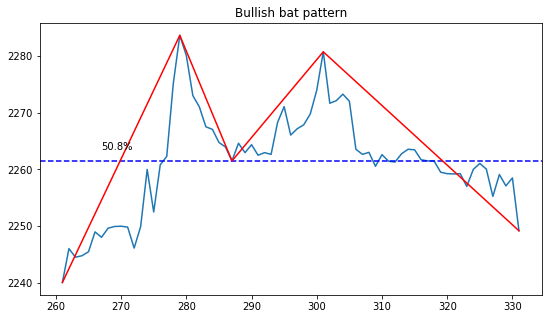

/home/arjun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


A_B retracement to X_A is: 50.8% which is within tolerance limit of 10.0% to range of 38.2 to 50.% 
B_C retracement to A_B is: 86.88% which is within tolerance limit of 10.0% in range of 38.2 to 88.6%
C_D retracement to B_C is: 175.52% which is within tolerance limit of 10.0% in range of 161.8 to 261.8%


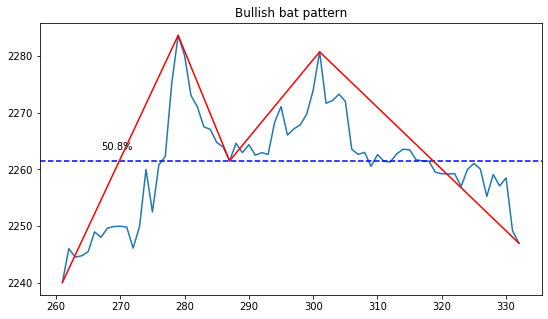

/home/arjun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


A_B retracement to X_A is: 50.8% which is within tolerance limit of 10.0% to range of 38.2 to 50.% 
B_C retracement to A_B is: 86.88% which is within tolerance limit of 10.0% in range of 38.2 to 88.6%
C_D retracement to B_C is: 177.34% which is within tolerance limit of 10.0% in range of 161.8 to 261.8%


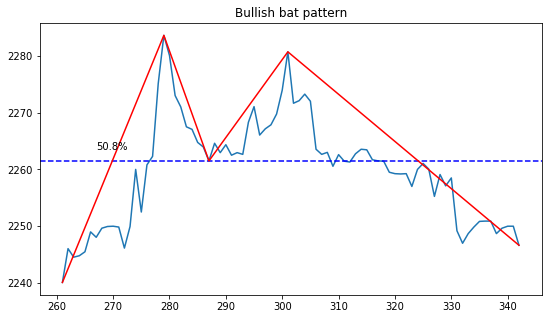

/home/arjun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


A_B retracement to X_A is: 68.93% which is within tolerance limit of 10.0% to 61.8% 
B_C retracement to A_B is: 65.15% which is within tolerance limit of 10.0% in range of 38.2 to 88.6%
C_D retracement to B_C is: 133.72% which is within tolerance limit of 10.0% in range of 127 to 161.8%


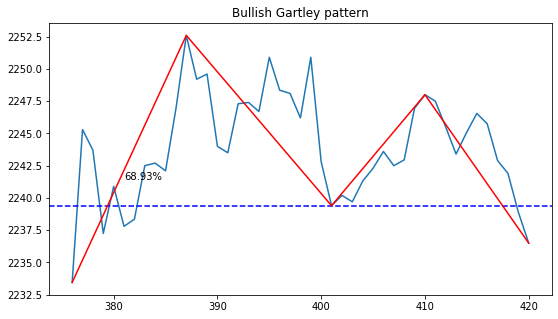

/home/arjun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


A_B retracement to X_A is: 68.93% which is within tolerance limit of 10.0% to 61.8% 
B_C retracement to A_B is: 65.15% which is within tolerance limit of 10.0% in range of 38.2 to 88.6%
C_D retracement to B_C is: 151.16% which is within tolerance limit of 10.0% in range of 127 to 161.8%


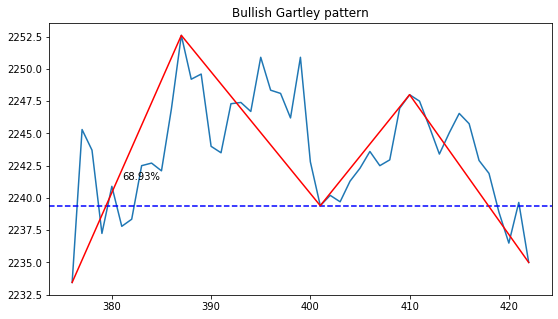

/home/arjun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


A_B retracement to X_A is: 68.93% which is within tolerance limit of 10.0% to 61.8% 
B_C retracement to A_B is: 65.15% which is within tolerance limit of 10.0% in range of 38.2 to 88.6%
C_D retracement to B_C is: 151.16% which is within tolerance limit of 10.0% in range of 127 to 161.8%


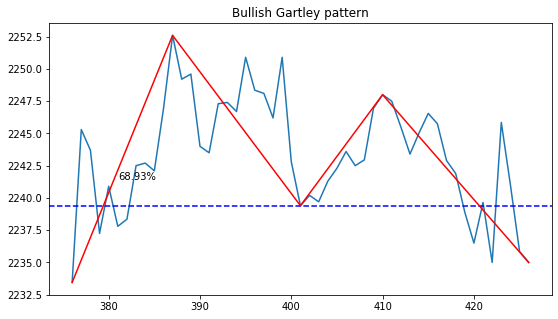

/home/arjun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


A_B retracement to X_A is: 68.93% which is within tolerance limit of 10.0% to 78.6% 
B_C retracement to A_B is: 65.15% which is within tolerance limit of 10.0% in range of 38.2 to 88.6%
C_D retracement to B_C is: 187.79% which is within tolerance limit of 10.0% in range of 161.8 to 261.8%


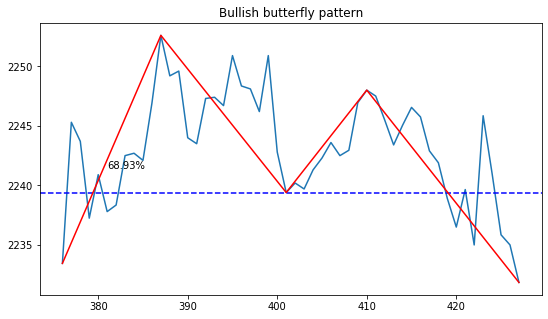

/home/arjun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


A_B retracement to X_A is: 68.93% which is within tolerance limit of 10.0% to range of 38.2 to 61.8% 
B_C retracement to A_B is: 65.15% which is within tolerance limit of 10.0% in range of 38.2 to 88.6%
C_D retracement to B_C is: 288.37% which is within tolerance limit of 10.0% in range of 224 to 361.8%


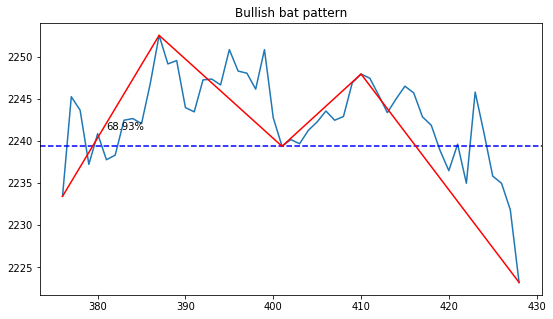

/home/arjun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


A_B retracement to X_A is: 68.93% which is within tolerance limit of 10.0% to range of 38.2 to 61.8% 
B_C retracement to A_B is: 65.15% which is within tolerance limit of 10.0% in range of 38.2 to 88.6%
C_D retracement to B_C is: 319.77% which is within tolerance limit of 10.0% in range of 224 to 361.8%


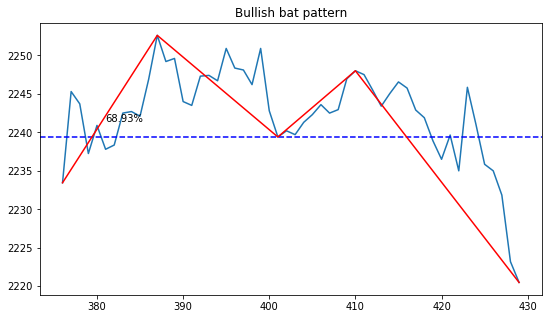

/home/arjun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


A_B retracement to X_A is: 68.93% which is within tolerance limit of 10.0% to range of 38.2 to 61.8% 
B_C retracement to A_B is: 65.15% which is within tolerance limit of 10.0% in range of 38.2 to 88.6%
C_D retracement to B_C is: 337.79% which is within tolerance limit of 10.0% in range of 224 to 361.8%


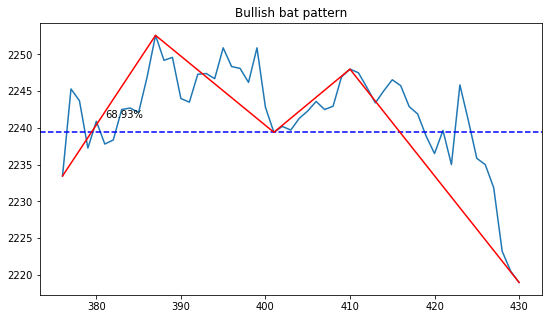

/home/arjun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


A_B retracement to X_A is: 59.35% which is within tolerance limit of 10.0% to 61.8% 
B_C retracement to A_B is: 66.84% which is within tolerance limit of 10.0% in range of 38.2 to 88.6%
C_D retracement to B_C is: 131.49% which is within tolerance limit of 10.0% in range of 127 to 161.8%


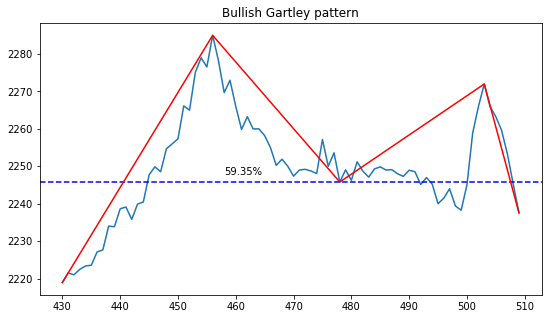

A_B retracement to X_A is: 59.35% which is within tolerance limit of 10.0% to 61.8% 
B_C retracement to A_B is: 66.84% which is within tolerance limit of 10.0% in range of 38.2 to 88.6%
C_D retracement to B_C is: 144.08% which is within tolerance limit of 10.0% in range of 127 to 161.8%


/home/arjun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


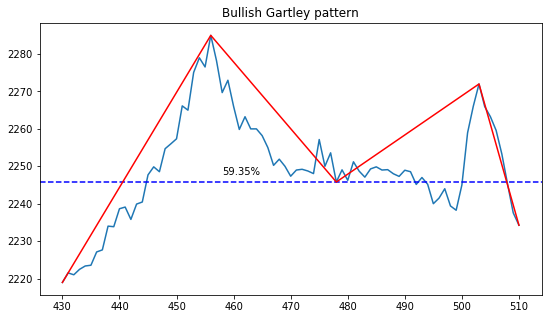

/home/arjun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


A_B retracement to X_A is: 59.35% which is within tolerance limit of 10.0% to 61.8% 
B_C retracement to A_B is: 66.84% which is within tolerance limit of 10.0% in range of 38.2 to 88.6%
C_D retracement to B_C is: 145.61% which is within tolerance limit of 10.0% in range of 127 to 161.8%


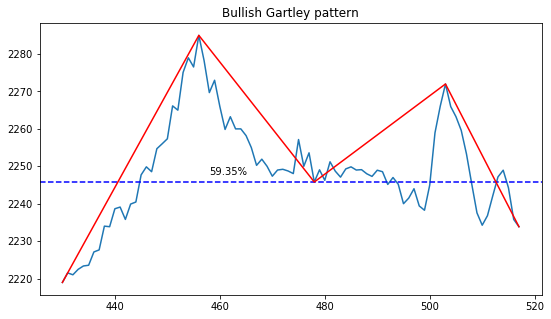

/home/arjun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


A_B retracement to X_A is: 40.67% which is within tolerance limit of 10.0% to range of 38.2 to 50.% 
B_C retracement to A_B is: 62.24% which is within tolerance limit of 10.0% in range of 38.2 to 88.6%
C_D retracement to B_C is: 173.13% which is within tolerance limit of 10.0% in range of 161.8 to 261.8%


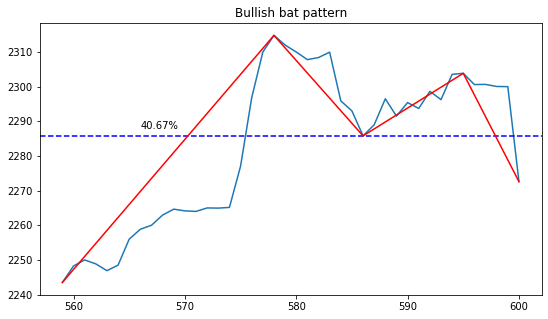

/home/arjun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


A_B retracement to X_A is: 30.67% which is within tolerance limit of 10.0% to 78.6% 
B_C retracement to A_B is: 82.71% which is within tolerance limit of 10.0% in range of 38.2 to 88.6%
C_D retracement to B_C is: 261.09% which is within tolerance limit of 10.0% in range of 161.8 to 261.8%


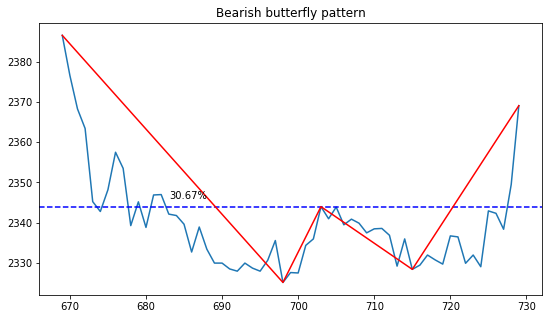

A_B retracement to X_A is: 30.67% which is within tolerance limit of 10.0% to range of 38.2 to 50.% 
B_C retracement to A_B is: 82.71% which is within tolerance limit of 10.0% in range of 38.2 to 88.6%
C_D retracement to B_C is: 261.09% which is within tolerance limit of 10.0% in range of 161.8 to 261.8%


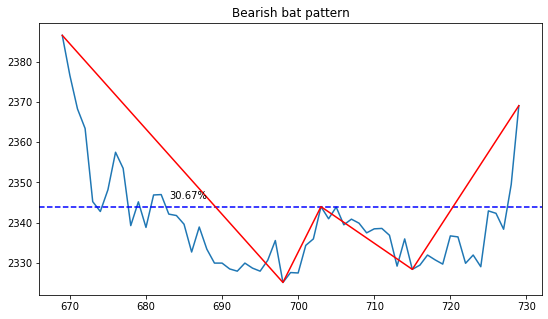

A_B retracement to X_A is: 30.67% which is within tolerance limit of 10.0% to range of 38.2 to 61.8% 
B_C retracement to A_B is: 82.71% which is within tolerance limit of 10.0% in range of 38.2 to 88.6%
C_D retracement to B_C is: 261.09% which is within tolerance limit of 10.0% in range of 224 to 361.8%


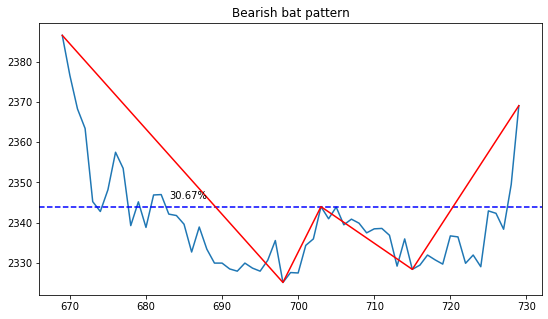

A_B retracement to X_A is: 30.67% which is within tolerance limit of 10.0% to range of 38.2 to 61.8% 
B_C retracement to A_B is: 82.71% which is within tolerance limit of 10.0% in range of 38.2 to 88.6%
C_D retracement to B_C is: 286.17% which is within tolerance limit of 10.0% in range of 224 to 361.8%


/home/arjun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


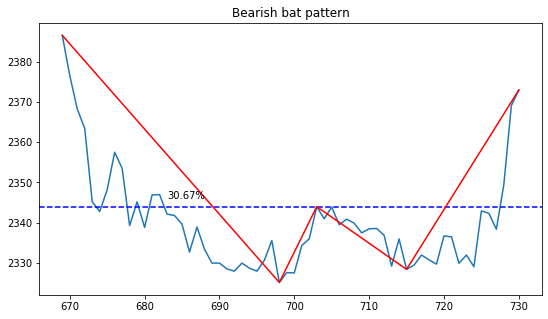

A_B retracement to X_A is: 30.67% which is within tolerance limit of 10.0% to range of 38.2 to 61.8% 
B_C retracement to A_B is: 82.71% which is within tolerance limit of 10.0% in range of 38.2 to 88.6%
C_D retracement to B_C is: 315.43% which is within tolerance limit of 10.0% in range of 224 to 361.8%


/home/arjun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


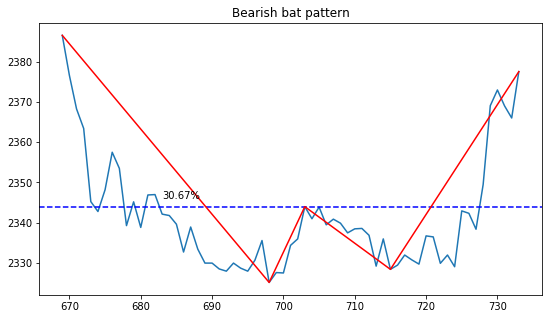

/home/arjun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


In [35]:
error_allowance = 10/100
pips = np.repeat(np.array([0.0]), 15)
for i in range(100, len(close_series)):
    series = close_series.values[:i]
    idx, current_index, current_price, start, end = get_peaks(series = close_series.values[:i])
    X_A = current_price[1] - current_price[0]
    A_B = current_price[2] - current_price[1]
    B_C = current_price[3] - current_price[2]
    C_D = current_price[4] - current_price[3]
    
    moves = [X_A, A_B, B_C, C_D]
    gartley = get_gartley(moves, error_allowance, series,i) 
    butterfly = get_butterfly(moves, error_allowance, series,i)
    bat = get_bat(moves, error_allowance, series,i) 
    crab = get_crab(moves, error_allowance, series,i) 